In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import fastai

print(fastai.__version__)

2.7.17


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.imports import *


In [ ]:
path1 = Path('/gdrive/My Drive/Tanks')
print(path1)
TrainDataPath = path1/'training_data'
print(TrainDataPath)

/gdrive/My Drive/Tanks
/gdrive/My Drive/Tanks/training_data


In [ ]:

batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(TrainDataPath, train=".", valid_pct=0.3, ds_tfms=batch_tfms, item_tfms=Resize(224))

In [ ]:
data

In [ ]:
print(len(data.valid_ds.items))
print(len(data.train_ds.items))


41
97


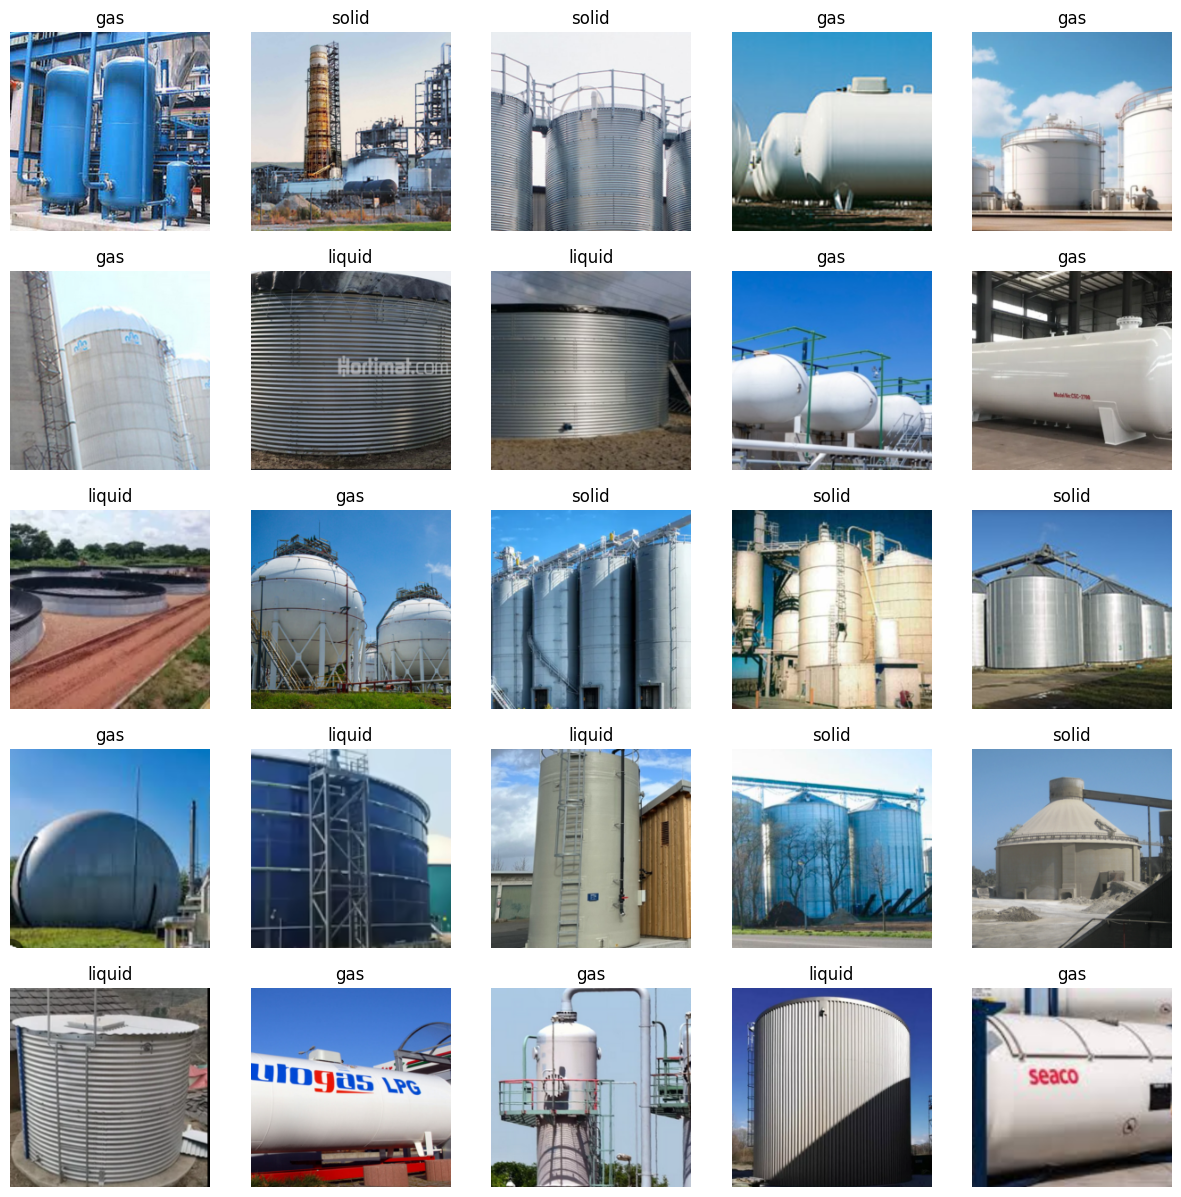

In [ ]:
data.show_batch(max_n=25)

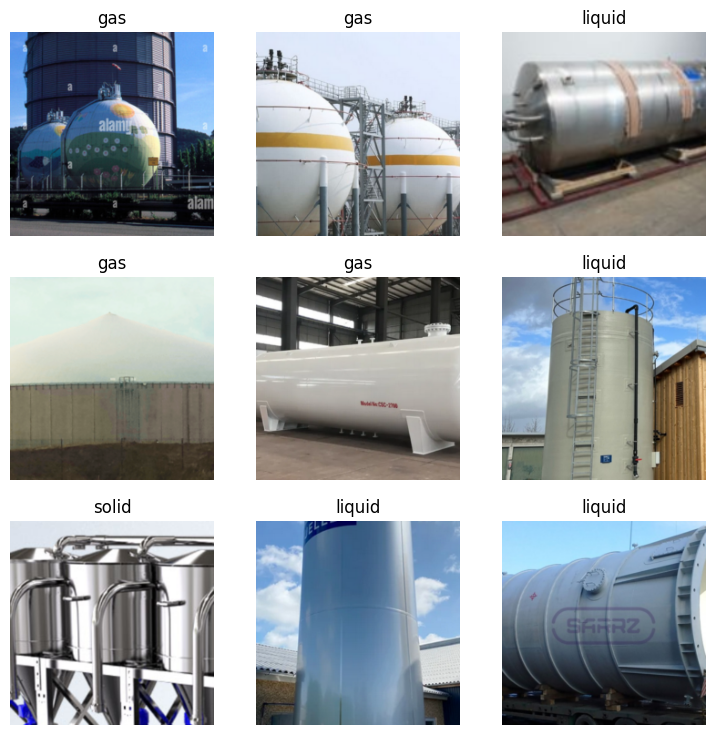

In [ ]:
data.valid.show_batch(max_n=9)

In [ ]:
learn = vision_learner(data, resnet18, metrics=error_rate)


In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.717802,2.127120,0.634146,00:23


epoch,train_loss,valid_loss,error_rate,time
0,1.761046,1.921384,0.585366,00:45
1,1.686453,1.634345,0.585366,00:35
2,1.451622,1.399657,0.487805,00:29


In [ ]:
learn.save('res18-2')

Path('/gdrive/My Drive/Tanks/training_data/models/res18-2.pth')

In [ ]:
learn.load('res18-2')
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

epoch,train_loss,valid_loss,error_rate,time
0,0.840164,1.250255,0.487805,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.706978,1.092041,0.463415,00:29
1,0.731513,0.948150,0.292683,00:28
2,0.685527,0.880717,0.317073,00:29


In [ ]:
learn.save('res18-3')

Path('/gdrive/My Drive/Tanks/training_data/models/res18-3.pth')

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.631648,0.844459,0.341463,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.473326,0.798120,0.317073,00:33
1,0.425086,0.707476,0.243902,00:30
2,0.380741,0.663052,0.243902,00:35


In [ ]:
learn.save('res18-4')

Path('/gdrive/My Drive/Tanks/training_data/models/res18-4.pth')

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.318720,0.646050,0.243902,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.297579,0.641677,0.243902,00:29
1,0.269465,0.647293,0.268293,00:29
2,0.231727,0.581610,0.243902,00:29
3,0.210513,0.578343,0.219512,00:29
4,0.187198,0.594702,0.195122,00:29


In [ ]:
learn.save('res18-5')

Path('/gdrive/My Drive/Tanks/training_data/models/res18-5.pth')

In [ ]:
learn.export(path1/'models/prodModel1')

In [ ]:
learn.fine_tune(5)
learn.save('res18-6')

epoch,train_loss,valid_loss,error_rate,time
0,0.059092,0.599831,0.219512,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.056908,0.575971,0.195122,00:30
1,0.058849,0.587064,0.195122,00:29
2,0.074538,0.592330,0.195122,00:30
3,0.068590,0.587909,0.195122,00:28
4,0.063529,0.570813,0.170732,00:33


Path('/gdrive/My Drive/Tanks/training_data/models/res18-6.pth')

In [ ]:
path1
!ls '/gdrive/My Drive/Tanks'

models	prodModel1  test_set  training_data


In [ ]:
learn.export(path1/'models/prodModel1')

In [ ]:
test_path = path1/'test_set'

In [ ]:
test_path
!ls '/gdrive/My Drive/Tanks/test_set'

gas_holder.jpg	gastest2.jpg  liqtest1.jpg  solid2.png	solidtest.jpg


In [ ]:
learn

In [ ]:
prediction = learn.predict( test_path/'gas_holder.jpg' )

prediction

('gas', tensor(0), tensor([9.3029e-01, 6.9523e-02, 1.9195e-04]))

In [ ]:
##learn.save is paired with learn.load and saves the model, and potentially optimizer.
##learn.export is paired with load_learner for deployment




In [ ]:
prod_models_path = path1/'models'
prod_learn = load_learner( prod_models_path/'prodModel1')

In [ ]:
prod_learn.predict( test_path/'gas_holder.jpg' )

('gas', tensor(0), tensor([9.3029e-01, 6.9523e-02, 1.9195e-04]))

In [ ]:
prod_learn.predict( test_path/'solidtest.jpg' )

('solid', tensor(2), tensor([0.0117, 0.0601, 0.9282]))

In [ ]:
prod_learn.predict( test_path/'solid2.png' )

('solid', tensor(2), tensor([7.2987e-03, 8.4118e-04, 9.9186e-01]))

In [ ]:
prod_learn.predict( test_path/'liqtest1.jpg' )

('liquid', tensor(1), tensor([0.0036, 0.9562, 0.0402]))

In [ ]:
prod_learn.predict( test_path/'gastest2.jpg' )

('liquid', tensor(1), tensor([5.1102e-04, 9.9685e-01, 2.6404e-03]))